In [22]:
import numpy as np
import matplotlib.pyplot as plt	

from _data import *

array([0.4, 0.4, 0, ..., 0.8, 0.7, 0.9], dtype=object)

In [23]:
for sensor_name, sensor in data.items():
  print('\n', sensor_name, '_'*70, '\n')
  
  for name, measure in sensor.items():
    if name != 'FORMATTED DATE-TIME':
      print("  %s [%s]:" % (name, measure['units']))
      v = measure['values']
      print("    mean = %s  var = %s  st.var. = %s" % (v.mean(), v.var(), v.std()))
  


 Sensor A ______________________________________________________________________ 

  Direction ‚ True [nan]:
    mean = 209.40630048465266  var = 10104.857537040567  st.var. = 100.52292045618535
  Wind Speed [m/s]:
    mean = 1.2903069466882062  var = 1.2506491788047214  st.var. = 1.1183242726529374
  Crosswind Speed [m/s]:
    mean = 0.9649434571890154  var = 0.9262185347673629  st.var. = 0.9624024806531636
  Headwind Speed [m/s]:
    mean = 0.16352988691437784  var = 1.034522111788522  st.var. = 1.017114601108706
  Temperature [¬∞C]:
    mean = 17.969103392568652  var = 15.857862039390799  st.var. = 3.9821931192988114
  Globe Temperature [¬∞C]:
    mean = 21.544588045234246  var = 68.16381158312034  st.var. = 8.25613781275
  Wind Chill [¬∞C]:
    mean = 17.838206785137345  var = 16.257877882926405  st.var. = 4.032105886869342
  Relative Humidity [%]:
    mean = 78.18477382875601  var = 375.85819708132095  st.var. = 19.38706262127713
  Heat Stress Index [¬∞C]:
    mean = 17.899596122

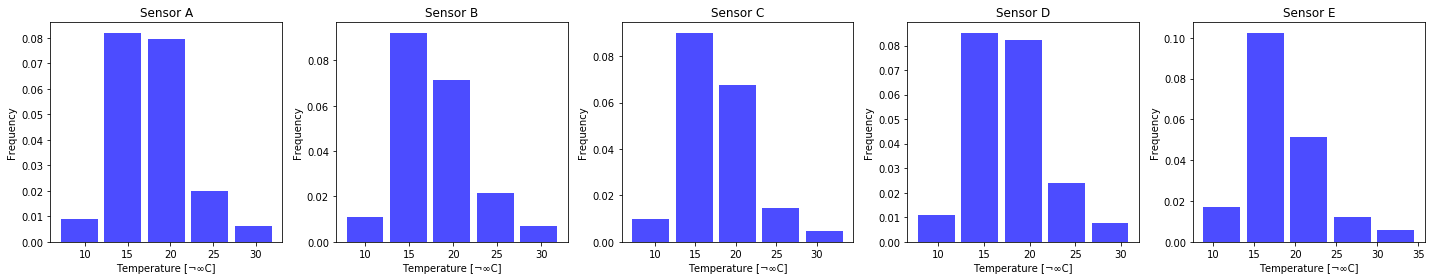

In [60]:
variable = 'Temperature'
bins = 50

fig = plt.figure(figsize=(20,4))

for i, (sensor_name, sensor) in enumerate(data.items()):
    ax_index = int(100 + 10*len(data) + i + 1)
    ax = fig.add_subplot(ax_index)
    ax.hist(x=sensor[variable]['values'], 
            bins=bins, density=True, color='b',alpha=0.7, rwidth=0.85)
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Frequency')
    ax.set_title(sensor_name)
    
plt.tight_layout()
plt.show()


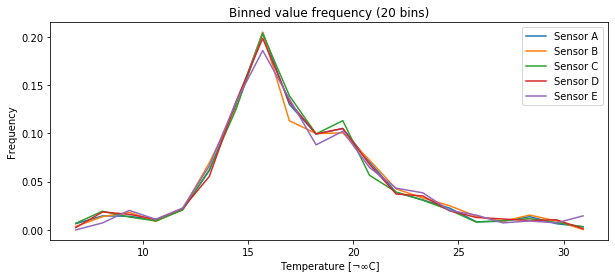

In [72]:
variable = 'Temperature'
bins = 20

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.set_title('Binned value frequency (%s bins)' % bins)

for sensor_name, sensor in data.items():
    values = sensor[variable]['values']
    [frequency, bins] = np.histogram(values, 
                                     bins=bins)
    frequency = [f/len(values) for f in frequency]
    ax.plot(bins[:-1], frequency, 
            label=sensor_name)
    ax.set_xlabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_ylabel('Frequency')
    
plt.legend(loc='upper right')
plt.show()

In [73]:
# 		## Code to modify for BOXPLOTS PART!
# 		fig = plt.figure(figsize=(14,6))
# 		fs = 14
# 		ax1 = fig.add_subplot(121)
# 		ax2 = fig.add_subplot(122)
# 		ax1.boxplot(WS,showmeans=True)
# 		ax1.set_ylabel('Wind Speed [m/s]',fontsize=fs)
# 		ax1.tick_params(labelsize=fs)
# 		ax2.boxplot(WD,showmeans=True)
# 		ax2.set_ylabel('Wind Direction [$^{\circ}$]',fontsize=fs)
# 		ax2.tick_params(labelsize=fs)
# 		plt.show()

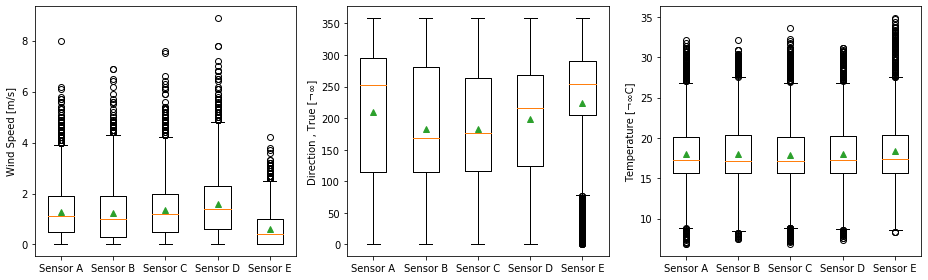

In [96]:
fig = plt.figure(figsize=(13,4))

subplots = [fig.add_subplot(131), 
            fig.add_subplot(132),
            fig.add_subplot(133)]

variables = ['Wind Speed', 
             'Direction ‚ True', 
             'Temperature']

for ax, variable in zip(subplots, variables):
    total_values = []
    for sensor_name, sensor in data.items():
        values = sensor[variable]['values']
        total_values.append(values)  
    ax.boxplot(total_values, showmeans=True, labels=data.keys())
    ax.set_ylabel('%s [%s]' % (variable, sensor[variable]['units']))
    ax.set_label(variable)
        
plt.tight_layout()
plt.show()
